Shape: (3798, 8)
      region    category       parameter  mode powertrain  year      unit  \
0  Australia  Historical        EV sales  Cars        BEV  2011  Vehicles   
1  Australia  Historical  EV stock share  Cars         EV  2011   percent   
2  Australia  Historical  EV sales share  Cars         EV  2011   percent   
3  Australia  Historical        EV stock  Cars        BEV  2011  Vehicles   
4  Australia  Historical        EV stock  Cars        BEV  2012  Vehicles   

       value  
0   49.00000  
1    0.00039  
2    0.00650  
3   49.00000  
4  220.00000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      3798 non-null   object 
 1   category    3798 non-null   object 
 2   parameter   3798 non-null   object 
 3   mode        3798 non-null   object 
 4   powertrain  3798 non-null   object 
 5   year        3798 non-null   int6

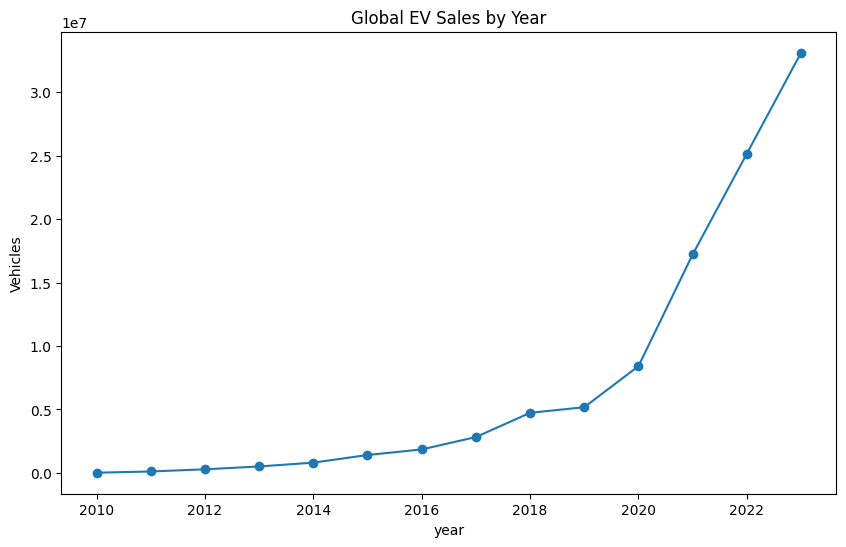

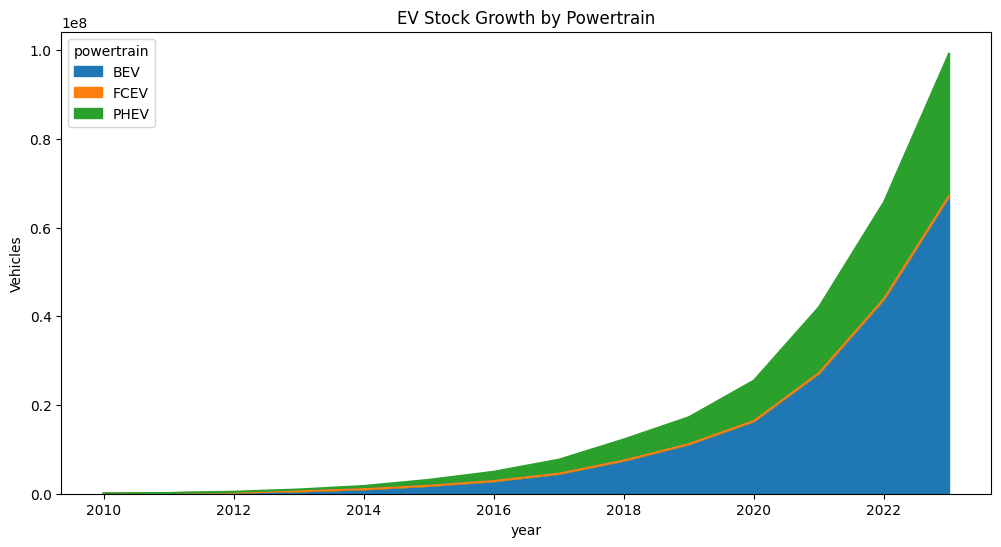

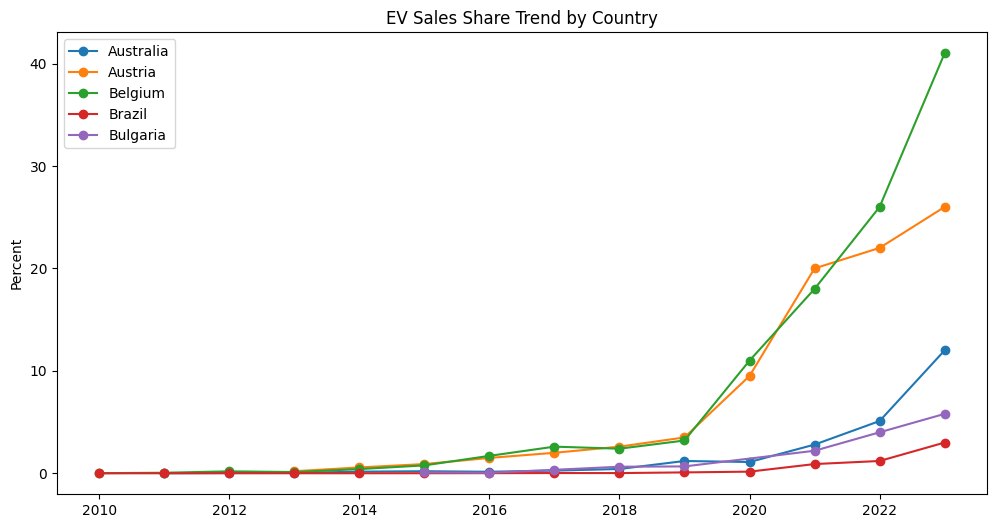

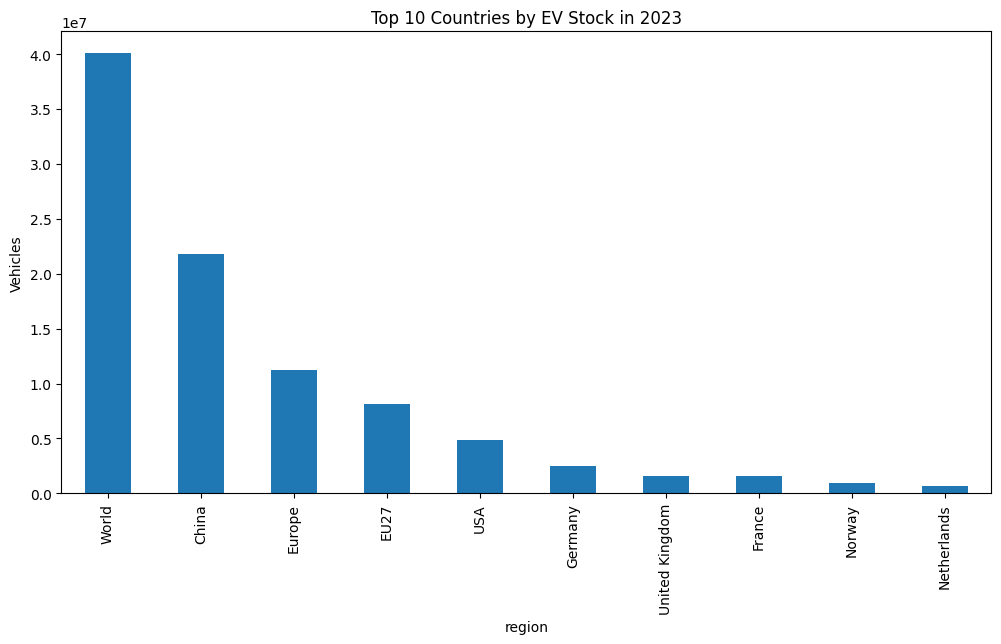

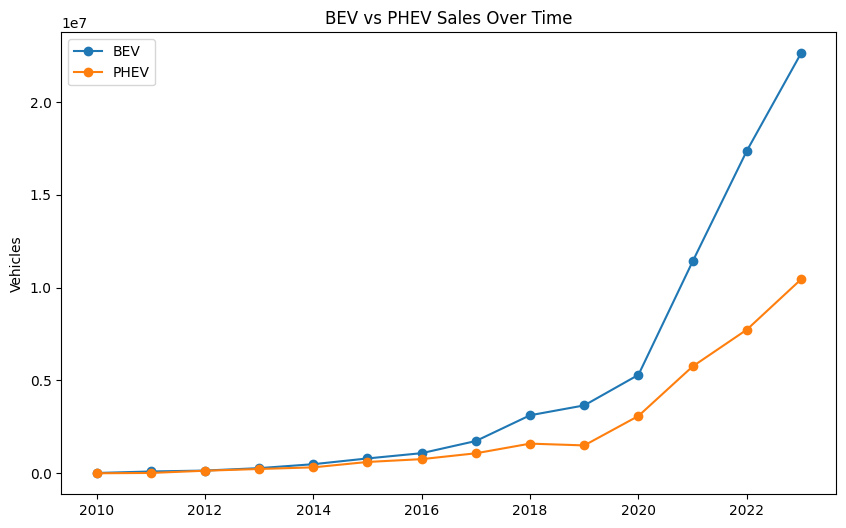

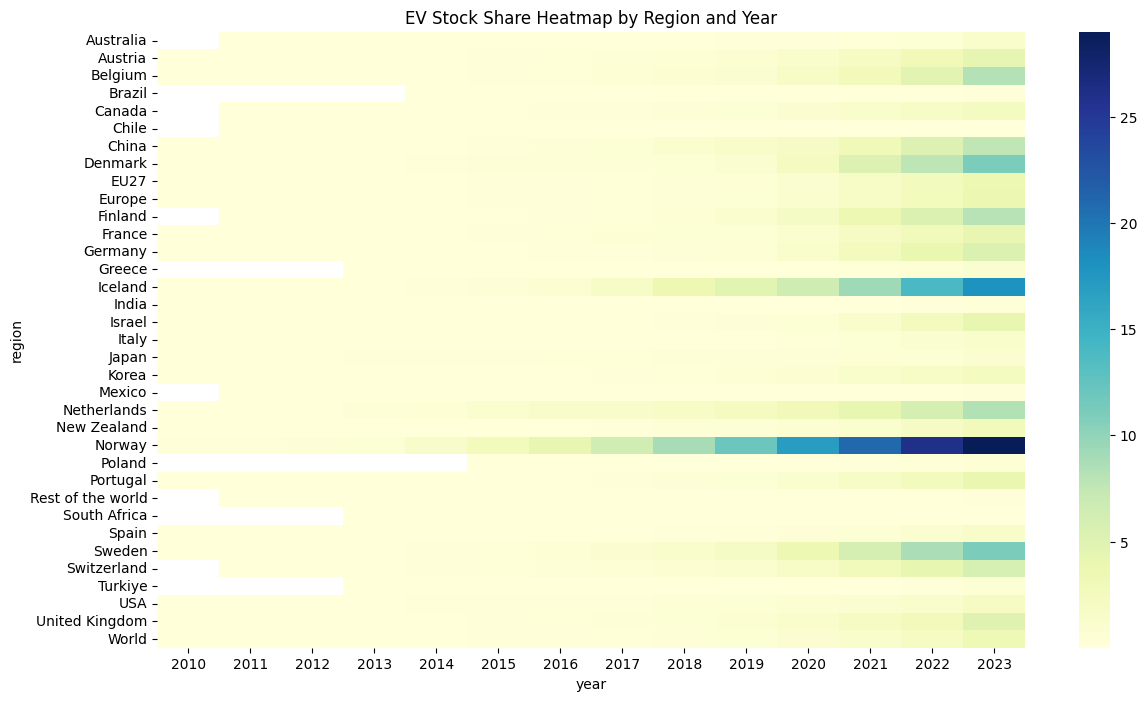

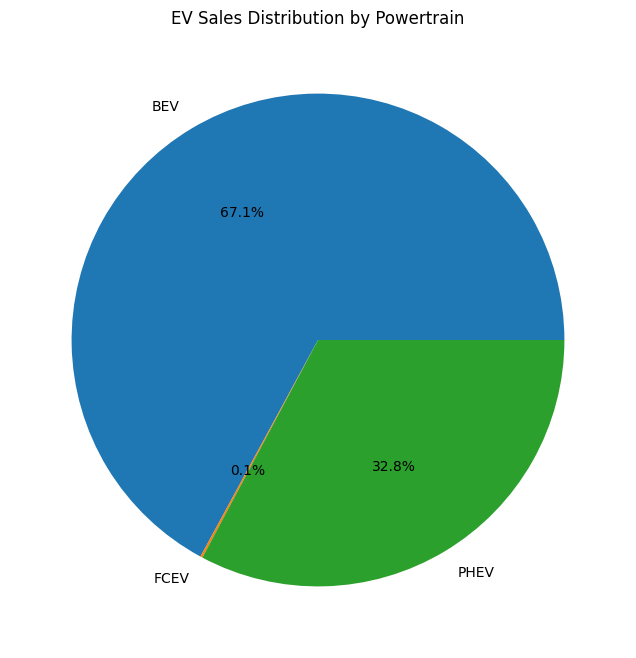

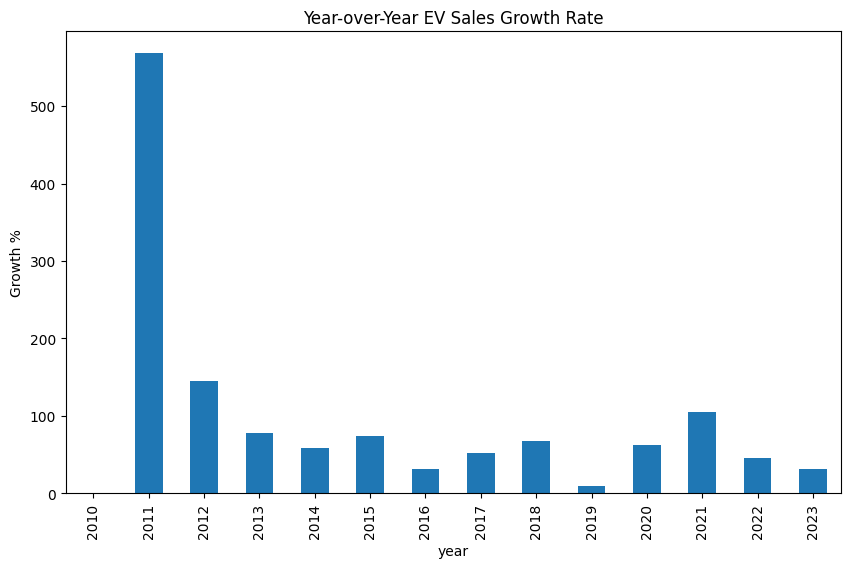

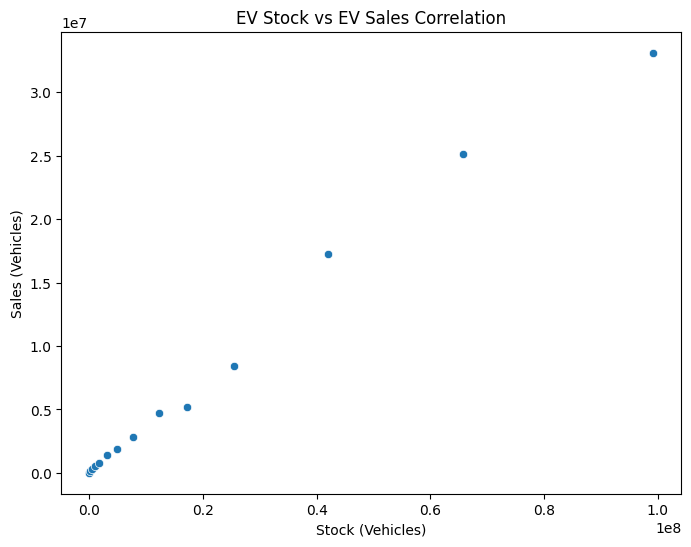

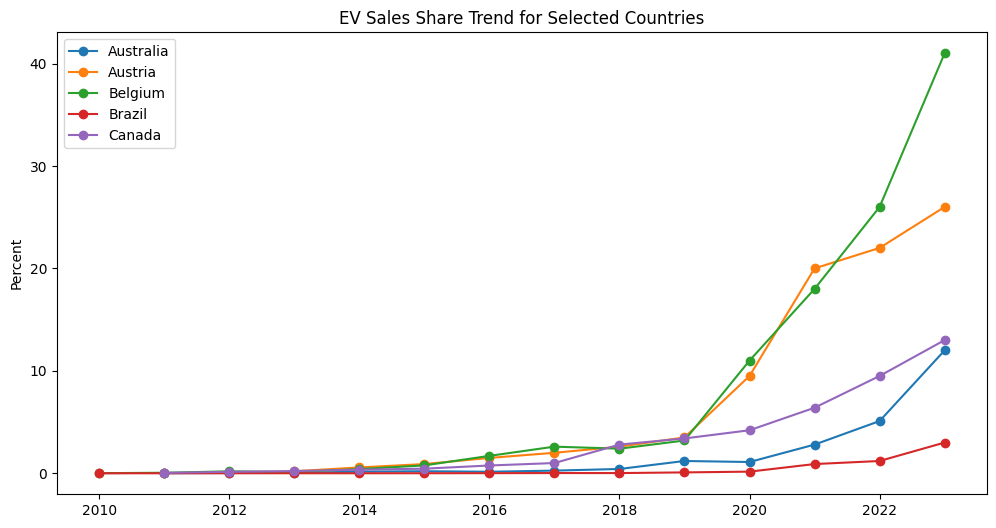

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Load and Inspect Data
# -----------------------------
df = pd.read_csv("EV salesHistoricalCars.csv")

print("Shape:", df.shape)
print(df.head())
print(df.info())
print(df.describe())
df.columns


# -----------------------------
# 2. Data Cleaning & Processing
# -----------------------------
df['year'] = df['year'].astype(int)
df['value'] = pd.to_numeric(df['value'], errors='coerce')
df = df.dropna(subset=['value'])

# Separate key parameters
sales = df[df['parameter'] == 'EV sales']
stock = df[df['parameter'] == 'EV stock']
sales_share = df[df['parameter'] == 'EV sales share']
stock_share = df[df['parameter'] == 'EV stock share']

# -----------------------------
# 3. Visualization 1: EV Sales by Year
# -----------------------------
plt.figure(figsize=(10,6))
sales.groupby('year')['value'].sum().plot(marker='o')
plt.title("Global EV Sales by Year")
plt.ylabel("Vehicles")
plt.show()

# -----------------------------
# 4. Visualization 2: EV Stock Growth by Powertrain
# -----------------------------
pivot_stock = stock.pivot_table(index='year', columns='powertrain', values='value', aggfunc='sum')
pivot_stock.plot.area(figsize=(12,6))
plt.title("EV Stock Growth by Powertrain")
plt.ylabel("Vehicles")
plt.show()

# -----------------------------
# 5. Visualization 3: EV Sales Share Trend by Country
# -----------------------------
plt.figure(figsize=(12,6))
for country in sales_share['region'].unique()[:5]:  # first 5 countries
    temp = sales_share[sales_share['region']==country]
    plt.plot(temp['year'], temp['value'], marker='o', label=country)
plt.legend()
plt.title("EV Sales Share Trend by Country")
plt.ylabel("Percent")
plt.show()

# -----------------------------
# 6. Visualization 4: Top 10 Countries by EV Stock in 2023
# -----------------------------
stock_2023 = stock[stock['year']==2023].groupby('region')['value'].sum().nlargest(10)
stock_2023.plot(kind='bar', figsize=(12,6))
plt.title("Top 10 Countries by EV Stock in 2023")
plt.ylabel("Vehicles")
plt.show()

# -----------------------------
# 7. Visualization 5: BEV vs PHEV Sales Over Time
# -----------------------------
bev = sales[sales['powertrain']=='BEV'].groupby('year')['value'].sum()
phev = sales[sales['powertrain']=='PHEV'].groupby('year')['value'].sum()

plt.figure(figsize=(10,6))
plt.plot(bev.index, bev.values, marker='o', label='BEV')
plt.plot(phev.index, phev.values, marker='o', label='PHEV')
plt.legend()
plt.title("BEV vs PHEV Sales Over Time")
plt.ylabel("Vehicles")
plt.show()

# -----------------------------
# 8. Visualization 6: EV Stock Share Heatmap
# -----------------------------
heatmap_data = stock_share.pivot_table(index='region', columns='year', values='value')
plt.figure(figsize=(14,8))
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title("EV Stock Share Heatmap by Region and Year")
plt.show()

# -----------------------------
# 9. Visualization 7: EV Sales Distribution by Powertrain
# -----------------------------
sales_powertrain = sales.groupby('powertrain')['value'].sum()
sales_powertrain.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title("EV Sales Distribution by Powertrain")
plt.ylabel("")
plt.show()

# -----------------------------
# 10. Visualization 8: Year-over-Year EV Sales Growth Rate
# -----------------------------
sales_yearly = sales.groupby('year')['value'].sum()
growth = sales_yearly.pct_change()*100
growth.plot(kind='bar', figsize=(10,6))
plt.title("Year-over-Year EV Sales Growth Rate")
plt.ylabel("Growth %")
plt.show()

# -----------------------------
# 11. Visualization 9: EV Stock vs EV Sales Correlation
# -----------------------------
merged = pd.merge(stock.groupby('year')['value'].sum().reset_index(),
                  sales.groupby('year')['value'].sum().reset_index(),
                  on='year', suffixes=('_stock','_sales'))

plt.figure(figsize=(8,6))
sns.scatterplot(x='value_stock', y='value_sales', data=merged)
plt.title("EV Stock vs EV Sales Correlation")
plt.xlabel("Stock (Vehicles)")
plt.ylabel("Sales (Vehicles)")
plt.show()

# -----------------------------
# 12. Visualization 10: EV Sales Share Trend for Selected Countries
# -----------------------------
countries = ['Australia','Austria','Belgium','Brazil','Canada']
plt.figure(figsize=(12,6))
for country in countries:
    temp = sales_share[sales_share['region']==country]
    plt.plot(temp['year'], temp['value'], marker='o', label=country)
plt.legend()
plt.title("EV Sales Share Trend for Selected Countries")
plt.ylabel("Percent")
plt.show()